In [128]:
import warnings
warnings.filterwarnings("ignore")
import boolean2 as b2
import matplotlib.pyplot as plt
from string_model_builder import string2definition
from numpy.ma import masked_equal
from matplotlib.colors import ListedColormap

In [148]:
# model helper functions
# initialise any loose nodes
def missing( node_name ):
    return True

def run_model(definition, steps=15, mode='sync'): # run model under settings
    model = b2.Model(text=definition, mode=mode)
    model.initialize( missing=missing ) # initialise any loose nodes to true
    model.iterate(steps=steps)
    return model
    
def print_model(model): # print node states
    for node in model.data:
        print node, model.data[node]

In [149]:
cmap = ListedColormap(['green'])
cmap.set_bad('red')

def plot_model(model, w=10, h=32): # plot node states 
    data = []
    labels = sorted(model.data.keys()) # nodes sorted alphabetically
    for label in labels:
        data.append(model.data[label])
        
    # figure
    plt.yticks(range(0, len(labels)), labels)
    plt.imshow(masked_equal(data, 0), cmap= cmap)
    plt.gcf().set_size_inches(w, h)

def plot_nodes(model, nodes, w=10, h=32): # plot node states 
    data = []
    labels = sorted(nodes) # nodes sorted alphabetically
    for label in labels:
        data.append(model.data[label])
        
    # figure
    plt.yticks(range(0, len(labels)), labels)
    plt.imshow(masked_equal(data, 0), cmap= cmap)
    plt.gcf().set_size_inches(w, h)


In [150]:
definition = string2definition('string-network-1.csv', 'True') 

In [151]:
model = run_model(definition)

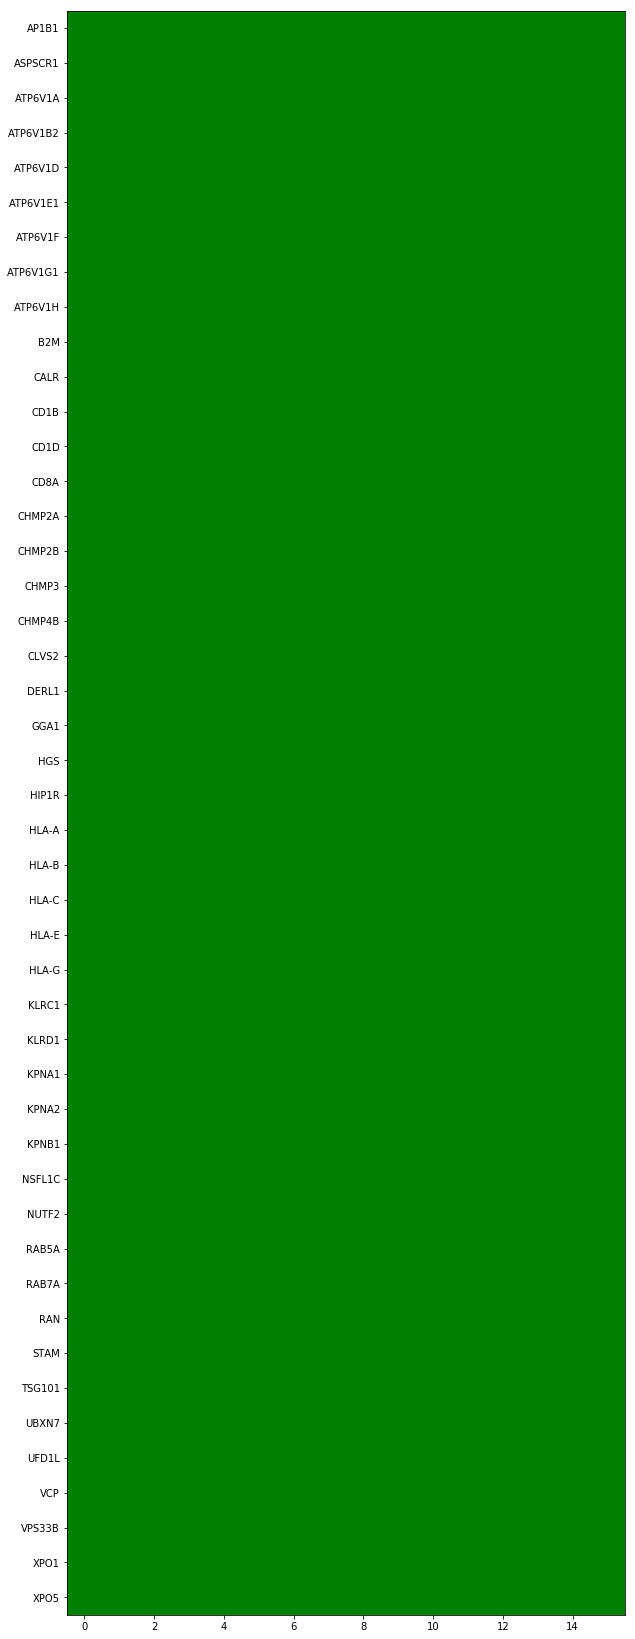

In [152]:
plot_model(model)